<a href="https://colab.research.google.com/github/Sanjeevp-07/Depression-Detection-Model/blob/main/Healthy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Healthy Patient Data Analysis on TASK condition**

In [21]:
pip install mne

In [22]:
pip install yasa

In [23]:
pip install eeglib


In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mne
import yasa
import eeglib

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
Healthy = mne.io.read_raw_edf("/content/drive/MyDrive/Seperation_DESt/Healthy/subject_001/H S1 TASK.edf", preload=True) #Healthy Dataset
Depressed = mne.io.read_raw_edf("/content/drive/MyDrive/Seperation_DESt/MDD/subject_001/MDD S1  EO.edf", preload=True) #Depressed Dataset

Extracting EDF parameters from /content/drive/MyDrive/Seperation_DESt/Healthy/subject_001/H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Extracting EDF parameters from /content/drive/MyDrive/Seperation_DESt/MDD/subject_001/MDD S1  EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 77055  =      0.000 ...   300.996 secs...


In [29]:
 #Apply Preprocessing Steps
Healthy.filter(1, 50, fir_design='firwin')  # Bandpass filtering (1-50Hz)
Depressed.filter(1, 50, fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 5

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<RawEDF | MDD S1  EO.edf, 20 x 77056 (301.0 s), ~11.8 MiB, data loaded>

In [30]:
classes=range(0,22)
class_labels=dict(zip(classes,Healthy.ch_names))
class_labels

{0: 'EEG Fp1-LE',
 1: 'EEG F3-LE',
 2: 'EEG C3-LE',
 3: 'EEG P3-LE',
 4: 'EEG O1-LE',
 5: 'EEG F7-LE',
 6: 'EEG T3-LE',
 7: 'EEG T5-LE',
 8: 'EEG Fz-LE',
 9: 'EEG Fp2-LE',
 10: 'EEG F4-LE',
 11: 'EEG C4-LE',
 12: 'EEG P4-LE',
 13: 'EEG O2-LE',
 14: 'EEG F8-LE',
 15: 'EEG T4-LE',
 16: 'EEG T6-LE',
 17: 'EEG Cz-LE',
 18: 'EEG Pz-LE',
 19: 'EEG A2-A1',
 20: 'EEG 23A-23R',
 21: 'EEG 24A-24R'}

In [31]:
print("Patient 1","\n",Healthy.info)

Patient 1 
 <Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-LE, EEG F3-LE, EEG C3-LE, EEG P3-LE, EEG O1-LE, EEG ...
 chs: 22 EEG
 custom_ref_applied: False
 highpass: 1.0 Hz
 lowpass: 50.0 Hz
 meas_date: 2013-01-12 16:23:35 UTC
 nchan: 22
 projs: []
 sfreq: 256.0 Hz
 subject_info: <subject_info | his_id: AzrieMurin, sex: 1, last_name: XX, birthday: 1978-01-01>
>


In [32]:
print(Healthy.ch_names)


['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']


In [33]:
sfreq_Healthy = Healthy.info['sfreq']
print(sfreq_Healthy)

256.0


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
Need more than one channel to make topography for eeg. Disabling interactivity.


<ipython-input-34-e3683134c9f3>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  Healthy.plot_psd(fmin=1, fmax=50, picks = 'EEG Fp1-LE' )


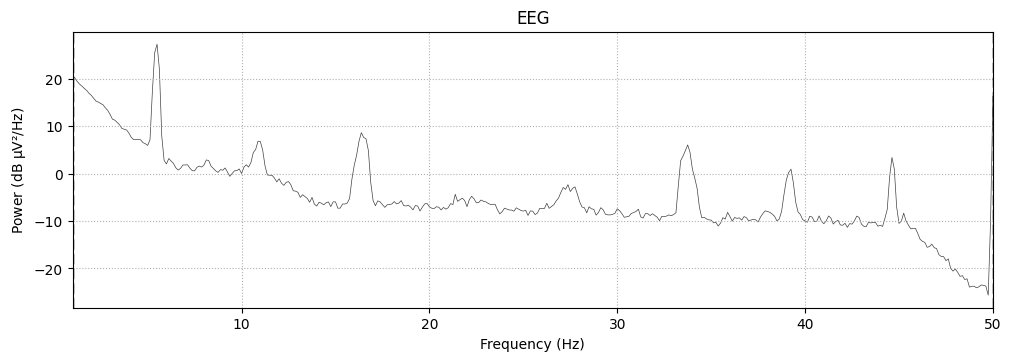

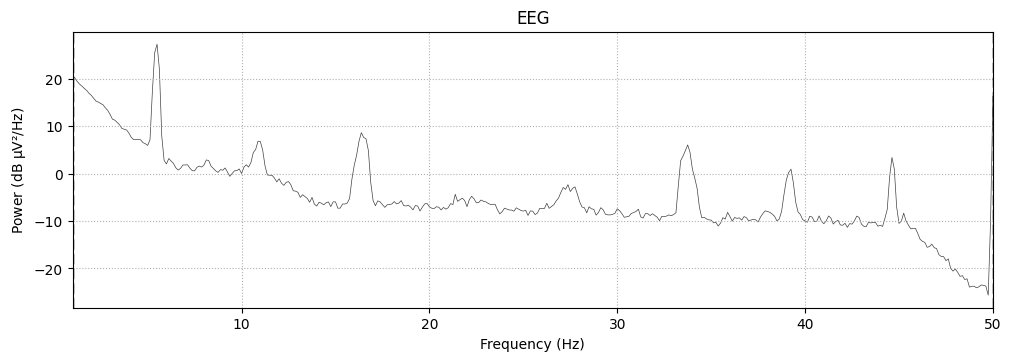

In [34]:
Healthy.plot_psd(fmin=1, fmax=50, picks = 'EEG Fp1-LE' )

In [35]:
Healthy_per_1 = Healthy.get_data()
print(Healthy_per_1.shape )
Healthy_per_1 = Healthy_per_1.transpose()
print(Healthy_per_1)

(22, 154880)
[[-1.18584613e-20 -1.69406589e-21  0.00000000e+00 ...  5.08219768e-21
  -3.97046694e-23 -9.52912066e-22]
 [-3.19970013e-06 -8.28927090e-06 -7.83348467e-06 ...  8.12344157e-07
  -5.26648782e-07  2.52492429e-07]
 [ 6.96926719e-07 -8.45684265e-06 -5.40791614e-06 ...  5.72718383e-07
  -7.83773004e-07  3.30519632e-07]
 ...
 [ 1.11124633e-05  4.28778089e-06  1.80130688e-05 ... -8.56436786e-07
   7.12572071e-09  1.05011862e-06]
 [ 7.88938982e-06  2.09609006e-06  1.20707294e-05 ... -4.61597903e-06
   8.65178525e-08  6.85632304e-07]
 [ 2.15670285e-21 -8.92254314e-24  5.90502148e-21 ... -2.47643493e-22
   2.64056833e-22  8.76648583e-22]]


In [36]:
df_Healthy =  pd.DataFrame(Healthy_per_1, columns=Healthy.info['ch_names'])
df_Healthy

,EEG Fp1-LE,EEG F3-LE,EEG C3-LE,EEG P3-LE,EEG O1-LE,EEG F7-LE,EEG T3-LE,EEG T5-LE,EEG Fz-LE,EEG Fp2-LE,...,EEG P4-LE,EEG O2-LE,EEG F8-LE,EEG T4-LE,EEG T6-LE,EEG Cz-LE,EEG Pz-LE,EEG A2-A1,EEG 23A-23R,EEG 24A-24R
0,-1.185846e-20,-1.694066e-21,0.000000e+00,1.694066e-21,-1.355253e-20,-1.058791e-22,0.000000e+00,-3.388132e-21,-5.082198e-21,1.058791e-21,...,-3.388132e-21,-5.082198e-21,-3.388132e-21,6.352747e-21,3.388132e-21,1.694066e-21,-3.388132e-21,5.082198e-21,-3.970467e-23,-9.529121e-22
1,-3.199700e-06,-8.289271e-06,-7.833485e-06,-3.904976e-06,-4.176250e-06,-9.186287e-06,-8.076148e-06,-3.646279e-06,-6.725922e-06,-2.775313e-06,...,-4.486634e-06,-2.135113e-06,-4.505392e-06,-1.019404e-05,-6.375215e-06,-3.738927e-06,-8.115125e-06,8.123442e-07,-5.266488e-07,2.524924e-07
2,6.969267e-07,-8.456843e-06,-5.407916e-06,7.905614e-07,5.391316e-07,-1.001635e-05,-5.801806e-06,1.739683e-06,-4.774110e-06,-2.927635e-07,...,-1.215779e-06,2.856045e-06,-5.786843e-06,-1.155213e-05,-4.710706e-06,4.563798e-07,-6.010927e-06,5.727184e-07,-7.837730e-07,3.305196e-07
3,9.321145e-06,-2.271807e-06,3.190619e-06,1.051712e-05,1.140030e-05,-4.218647e-06,2.602135e-06,1.248893e-05,3.647586e-06,5.139643e-06,...,7.497521e-06,1.180558e-05,-6.157826e-06,-5.881006e-06,3.147711e-06,9.246262e-06,2.292236e-06,-1.941477e-07,-6.817078e-07,1.059374e-07
4,1.378813e-05,1.130988e-06,4.201139e-06,1.378669e-05,1.744986e-05,-1.078034e-06,3.237986e-06,1.657368e-05,8.341166e-06,6.590121e-06,...,1.221978e-05,1.499775e-05,-1.072679e-05,-2.867945e-06,8.142950e-06,1.193699e-05,3.158480e-06,1.076319e-07,-3.706579e-07,-4.094992e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154875,4.407286e-06,3.195083e-06,6.516744e-06,-6.696244e-06,6.576792e-06,-1.737467e-06,9.365021e-06,-8.125617e-06,8.749924e-06,-7.094184e-06,...,1.006516e-05,-2.200614e-06,1.031156e-05,1.796428e-06,1.058702e-05,-5.385772e-06,1.038343e-05,1.707706e-05,-9.488634e-07,5.527099e-07
154876,8.617614e-06,5.050172e-06,1.496459e-05,8.616751e-07,1.023514e-05,1.976328e-06,1.688113e-05,-1.327387e-06,1.151937e-05,7.522274e-07,...,1.274286e-05,4.702773e-06,1.699889e-05,7.202493e-06,1.228524e-05,1.511068e-06,1.961689e-05,9.741178e-06,-3.444174e-07,9.574750e-07
154877,1.111246e-05,4.287781e-06,1.801307e-05,6.206091e-06,1.029232e-05,3.066238e-06,1.812264e-05,3.864578e-06,1.208643e-05,7.288940e-06,...,1.241530e-05,8.458978e-06,1.739813e-05,9.271785e-06,1.178614e-05,6.508032e-06,2.147857e-05,-8.564368e-07,7.125721e-09,1.050119e-06
154878,7.889390e-06,2.096090e-06,1.207073e-05,5.428835e-06,6.210761e-06,1.875536e-06,1.140506e-05,3.902489e-06,7.798425e-06,6.739385e-06,...,7.613514e-06,6.293227e-06,1.069785e-05,6.262016e-06,7.264072e-06,5.562797e-06,1.369360e-05,-4.615979e-06,8.651785e-08,6.856323e-07


In [37]:
bp_Healthy = yasa.bandpower(Healthy, sf=sfreq_Healthy, ch_names= Healthy.info['ch_names'], win_sec= 0.25)
bp_Healthy

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
Chan,,,,,,,,,
EEG Fp1-LE,0.0,0.663385,0.243494,0.026878,0.028809,0.018613,173.330343,4.0,True
EEG F3-LE,0.0,0.619123,0.247832,0.042495,0.051116,0.025473,65.707173,4.0,True
EEG C3-LE,0.0,0.659806,0.257671,0.033349,0.020678,0.021825,179.921774,4.0,True
EEG P3-LE,0.0,0.560787,0.261478,0.075700,0.046564,0.041205,111.080813,4.0,True
EEG O1-LE,0.0,0.628134,0.256606,0.045055,0.034206,0.017708,243.028115,4.0,True
EEG F7-LE,0.0,0.625284,0.245170,0.039925,0.050114,0.026270,85.219639,4.0,True
EEG T3-LE,0.0,0.658173,0.255959,0.032236,0.022221,0.023314,195.399187,4.0,True
EEG T5-LE,0.0,0.532424,0.271859,0.089701,0.051042,0.039614,113.590897,4.0,True
EEG Fz-LE,0.0,0.657845,0.247005,0.027521,0.027117,0.018608,189.192655,4.0,True


In [38]:
#DFA Detrended Fluctuation Analysis at Pz Channels
Pz_Healthy = df_Healthy['EEG Pz-LE'].values

In [39]:
dfa_result = eeglib.features.DFA(Pz_Healthy)
print(dfa_result)

0.41370430303731015


In [41]:
LZC = np.empty(shape=(22))
for i, channel_name in enumerate(Healthy.info['ch_names']):  # Iterate through channel names
  LZC[i] =  eeglib.features.LZC(df_Healthy[channel_name].to_numpy())  # Access column by name
LZC_df = pd.DataFrame(LZC, columns = ['LZC'])
LZC_df.index = Healthy.info['ch_names']
print(LZC_df)

                  LZC
EEG Fp1-LE   0.325714
EEG F3-LE    0.501150
EEG C3-LE    0.391836
EEG P3-LE    0.468311
EEG O1-LE    0.372356
EEG F7-LE    0.499480
EEG T3-LE    0.394063
EEG T5-LE    0.479331
EEG Fz-LE    0.311799
EEG Fp2-LE   0.459294
EEG F4-LE    0.432801
EEG C4-LE    0.505157
EEG P4-LE    0.326716
EEG O2-LE    0.481112
EEG F8-LE    0.435361
EEG T4-LE    0.501038
EEG T6-LE    0.341298
EEG Cz-LE    0.467087
EEG Pz-LE    0.407977
EEG A2-A1    0.490574
EEG 23A-23R  0.715101
EEG 24A-24R  0.147161


In [45]:
HFD = np.empty(shape=(22))
for i, channel_name in enumerate(Healthy.info['ch_names']):
  HFD[i] = eeglib.features.HFD(df_Healthy[channel_name].to_numpy())
HFD_df =  pd.DataFrame(HFD, columns=['HFD'])
HFD_df.index = Healthy.info['ch_names']
print(HFD_df)


                  HFD
EEG Fp1-LE   2.097836
EEG F3-LE    2.095854
EEG C3-LE    2.093883
EEG P3-LE    2.093197
EEG O1-LE    2.092524
EEG F7-LE    2.102766
EEG T3-LE    2.094355
EEG T5-LE    2.092915
EEG Fz-LE    2.092401
EEG Fp2-LE   2.096603
EEG F4-LE    2.094496
EEG C4-LE    2.096733
EEG P4-LE    2.093189
EEG O2-LE    2.093508
EEG F8-LE    2.097301
EEG T4-LE    2.098510
EEG T6-LE    2.093653
EEG Cz-LE    2.093243
EEG Pz-LE    2.092909
EEG A2-A1    2.096376
EEG 23A-23R  2.096515
EEG 24A-24R  2.094109
